## 1. Importowanie bibliotek oraz danych

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN

data = pd.read_csv('../../clustering_R3.csv')

In [5]:
data.head(5)

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


## 2. Wizualizacja zbioru

In [8]:
fig = px.scatter_3d(data, x='X1', y='X2', z='X3')
fig.update_layout(
    title="Wizualizacja zbioru"
)
fig.show()

Widzimy, że na pierwszy rzut oka jesteśmy w stanie wyróznić 4 klastry danych. Zobaczmy, czy metryki również wskażą liczbę 4 jako optymalną liczbę klastrów.

## 3. Algorytm K-Means
Jako, że kształty skupisk są w miarę regularne możemy użyć algorytmu K-Means, który w takich przypadkach dobrze się sprawdza.

### 3.1. Intuicyjna klasteryzacja dla k = 4

In [13]:
km = KMeans(n_clusters = 4, random_state = 0).fit(data)
labels = km.labels_
centroids = km.cluster_centers_

fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color=labels)
fig.update_layout(
    title="Wizualizacja zbioru K-Means"
)
fig.show()

Widzimy, że algorytm K-Means wyznaczył inny podział punktów niż mogliśmy się tego spodziewać.

### 3.2. Analiza Silhouette
Sprawdźmy, czy k = 4 to optymalna liczba klastrów dla algorytmu K-Means. Dokładnie opisana została w mojej poprzedniej pracy domowej. 

For n_clusters = 2 The average silhouette_score is : 0.8085010364583614
For n_clusters = 3 The average silhouette_score is : 0.8462944352356326
For n_clusters = 4 The average silhouette_score is : 0.6614753522212494
For n_clusters = 5 The average silhouette_score is : 0.7090574622615002
For n_clusters = 6 The average silhouette_score is : 0.7403017919858345
For n_clusters = 7 The average silhouette_score is : 0.7150527386575581
For n_clusters = 8 The average silhouette_score is : 0.7031316097613298
For n_clusters = 9 The average silhouette_score is : 0.6896692148975844
For n_clusters = 10 The average silhouette_score is : 0.6802481428102957
For n_clusters = 11 The average silhouette_score is : 0.4339464657259108


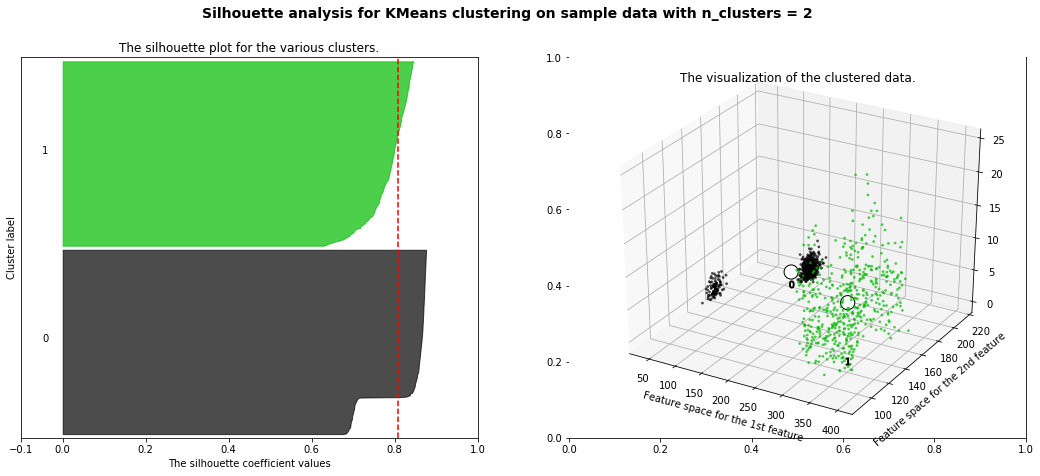

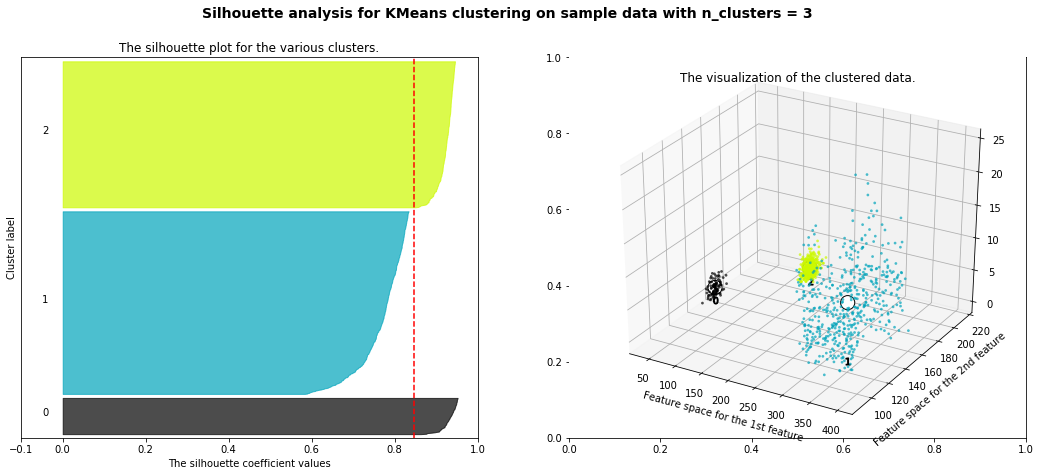

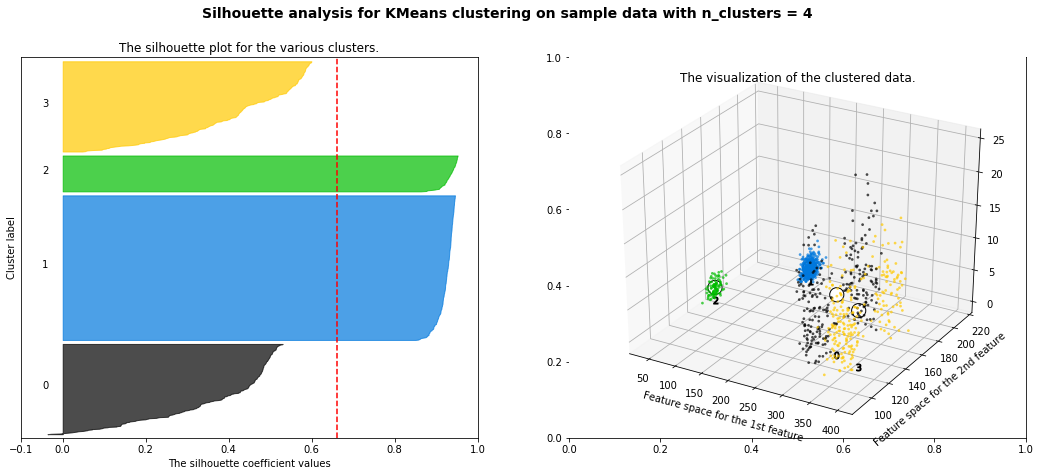

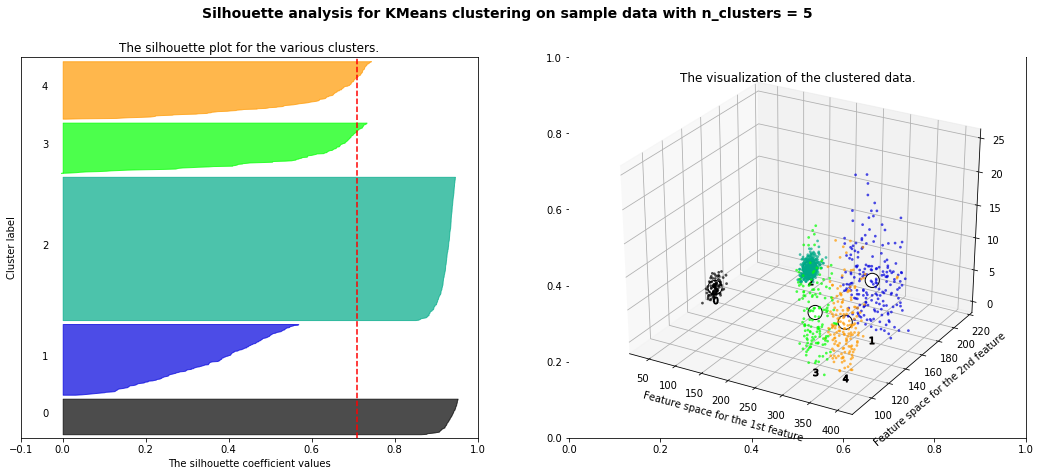

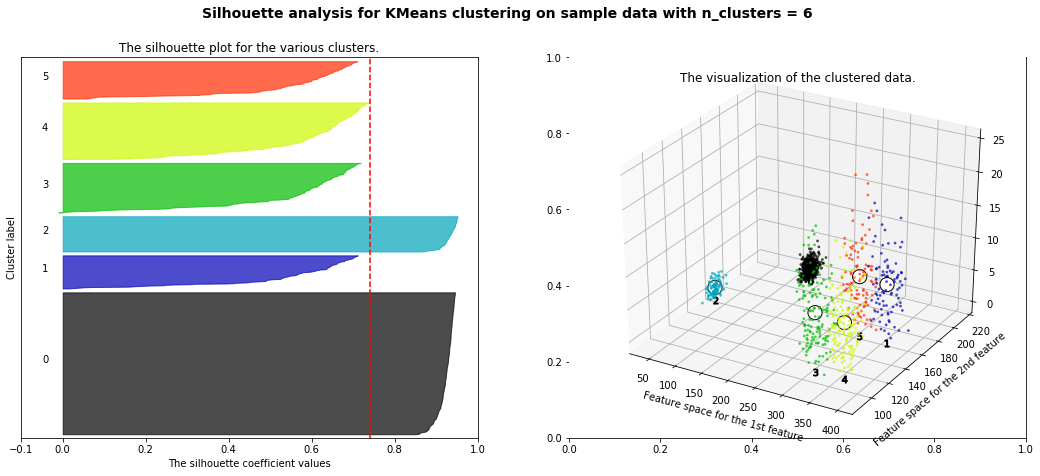

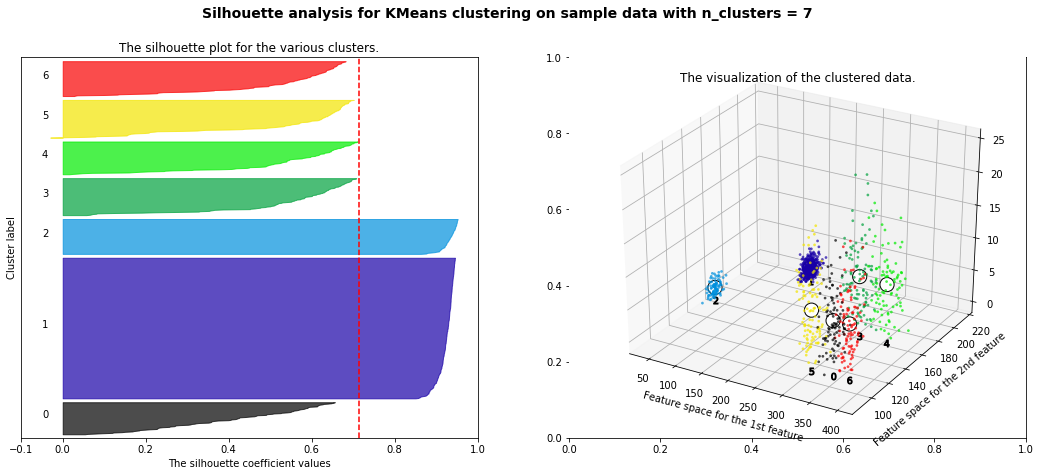

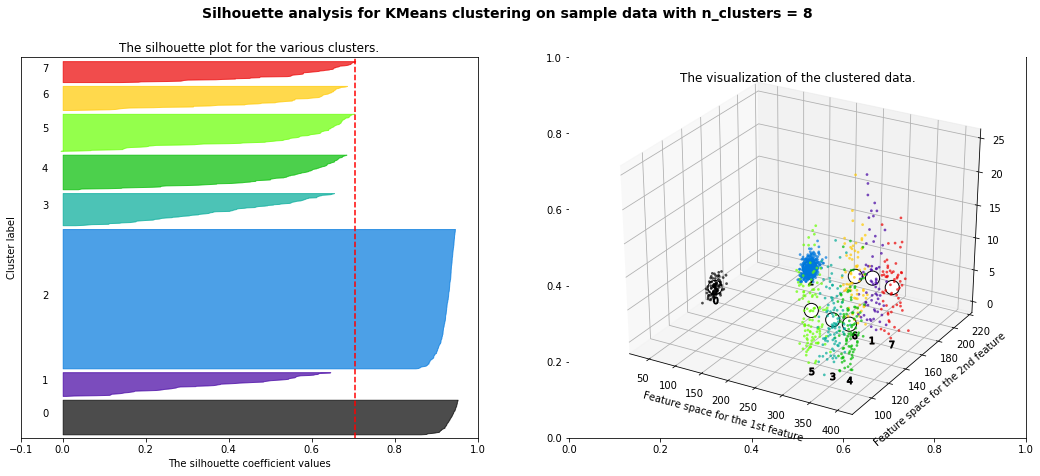

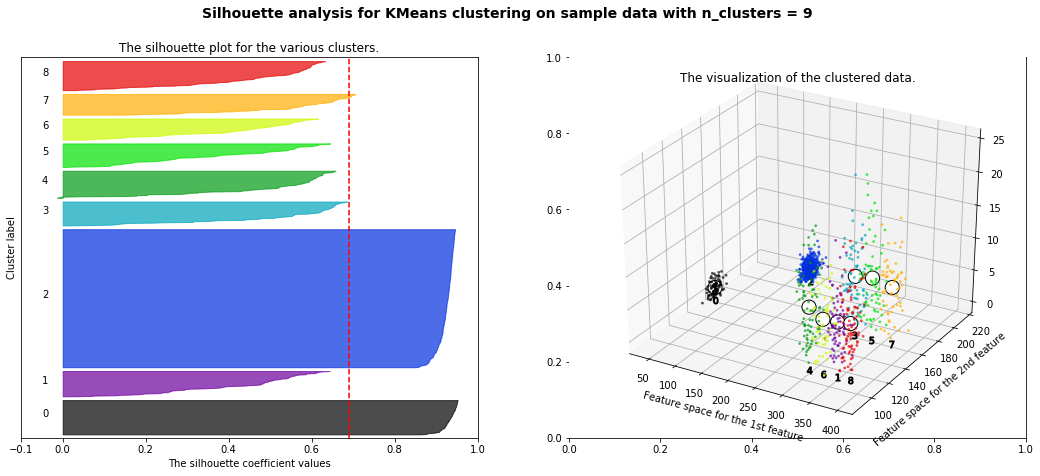

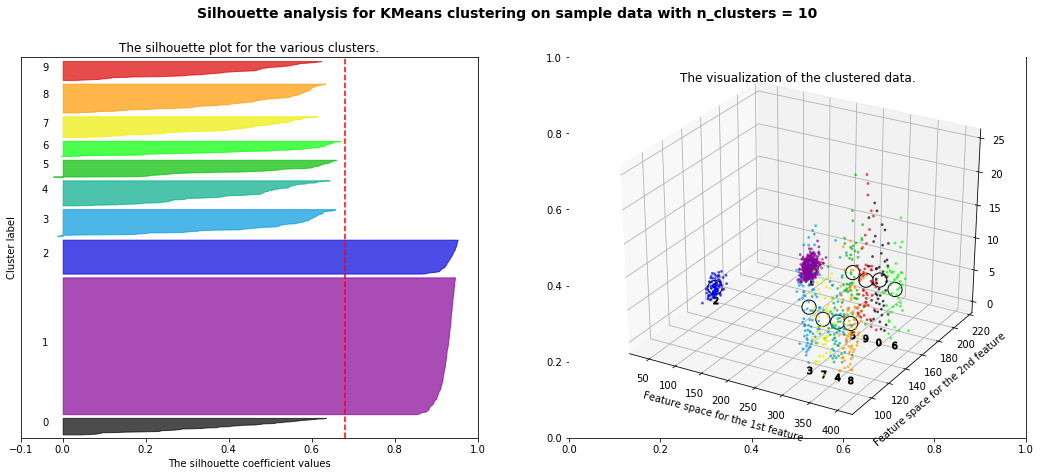

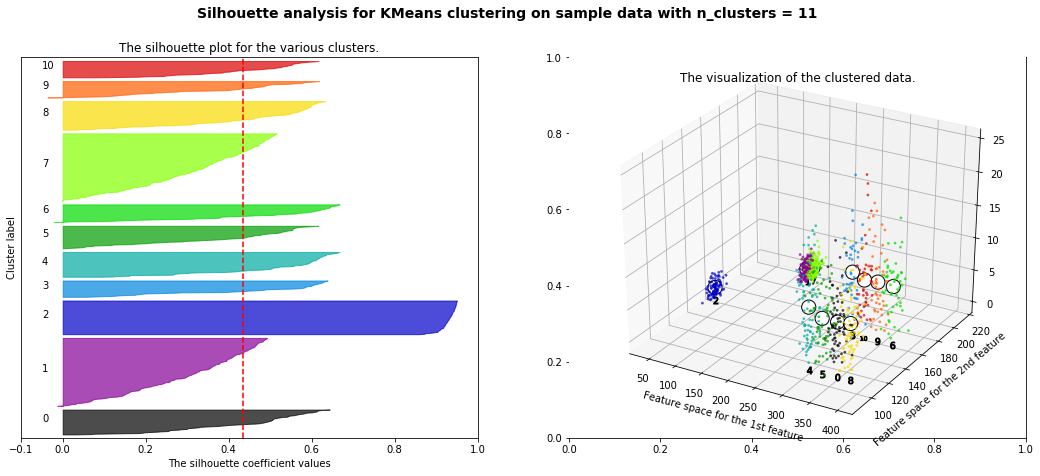

In [21]:
range_n_clusters = [i for i in range(2,12)]
X = data

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(X["X1"], X["X2"], X["X3"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], centers[:,2] , marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Widzimy, że najwyższy średni wynik współczynników z całej próbki otrzymaliśmy dla $k = 3$. Zatem przyjmijmy, że to jest nasza optymalna wartość $k$ wyznaczona dla algorytmu KMeans, wbrew temu co wcześniej założyliśmy.

### 3.3. Wizualizacja dla "optymalnego" k

In [22]:
km = KMeans(n_clusters = 3, random_state = 0).fit(data)
labels = km.labels_
centroids = km.cluster_centers_

fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color=labels)
fig.update_layout(
    title="Wizualizacja zbioru K-Means"
)
fig.show()

## 4. DBSCAN
Metoda była ta omawiana na laboratoriach, więc nie będę się and nią rozwodził. W skrócie polega na podzieleniu punktów na 3 typy:
- core points - punkty, które wraz ze swoimi sąsiadami tworzą klastry
- border points - punkty, którę są sąsiadujące z core points, ale nie mają wystarczajacej ilości sąsiadów, aby być core points
- outliers - punkty, które nie spełniają powyższych założeń

### 4.1. Strojenie parametrów
W DBSCANie nie podajemy jawnie ilosći kalstrów, lecz operujemy 2 parametrami: eps, minSamples, które określaja odpowiednio odległość w jakiej szukamy sąsiadów oraz ile sąsiadów musi być, żeby zakwalifikować punkt jako core point. W takiej sytuacji posłużymy się swoistym grid_searchem i znajdziemy parametry takie, przy których wspołczynnik sihouette'a jest największy.

In [47]:
eps_list = [i/10 for i in range(5,100)]
min_samples_list = [i for i in range(3,100)]
best_score = -np.Infinity
X = data

for i in range(len(eps_list)):
    for j in range(len(min_samples_list)):
        db = DBSCAN(eps = eps_list[i], min_samples = min_samples_list[j]).fit(X)
        labels = db.labels_
        try:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                # Liczba klastrów, ignorująca outliery, jeżeli są obecne
                n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
                best_eps = eps_list[i]
                best_samples = min_samples_list[j]
        except:
            print("Za dużo/za mało powstałych klastrów")

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych klastrów
Za dużo/za mało powstałych k

### 4.2. DBSCAN dla "najlepszych" parametrów

In [57]:
print(f"Najlepszy parametr eps to {best_eps}")
print(f"Najlepszy parametr min_samples to {best_samples}")
print(f"Nawyższa wartość współczynnika silhouette'a to {best_score}")
print(f"Ilość klastrów przy tych parametrach wynosi {n_clusters_}")

Najlepszy parametr eps to 7.9
Najlepszy parametr min_samples to 40
Nawyższa wartość współczynnika silhouette'a to 0.8462944352356326
Ilość klastrów przy tych parametrach wynosi 2


In [69]:
best_db = DBSCAN(eps = best_eps, min_samples = best_samples).fit(X)
db_labels = best_db.labels_

fig = px.scatter_3d(X, x='X1', y='X2', z='X3', color = db_labels)
fig.update_layout(
    title="Wizualizacja zbioru DBSCAN"
)
fig.show()

Widzimy, że cały zbiór na fioletowo został zakwalifikowany jako outliery, co wynika z faktu, że punkty te są dużo mniej gęsto rozmieszczone niż te w skupiskach żółtych oraz czerwonych. Jako, że nas ouliery nie interesują przyjmijmy, że zbiór oulierów jest nowym klastrem, dlatego $k$ znalezione poprzez maksymalziacje współczynniak silhouette'a jest równe 3 

## 5. Porównanie obu algorytmów
Porównajmy oba algorytmy dla parametrów, dla których osiągneły one najwyższy wynik silhouette'a. POorównamy również ich współczynnik Daviesa-Bouldina, który opisałem dokładnie w swojej poprzedniej pracy domowej.

In [71]:
k_labels = KMeans(n_clusters = 3, random_state = 0).fit(data).labels_

pd.DataFrame({
    "Algorytm": ["Ilość klastrów","Wspołczynnik Silhouette'a","Współczynnik Daviesa-Bouldina"],
    "K-Means": [3, 0.846, davies_bouldin_score(X, k_labels)],
    "DBSCAN": [3, 0.846, davies_bouldin_score(X, db_labels)]
})

,Algorytm,K-Means,DBSCAN
0,Ilość klastrów,3.000000,3.000000
1,Wspołczynnik Silhouette'a,0.846000,0.846000
2,Współczynnik Daviesa_Bouldina,0.180341,0.180341


Widzimy, że oba algorytmy tak samo przydzieliły labele punktom, biorąc pod uwagę, że każdy robił to maskymalizując współczynnik Silhouette'a i wyniki są identyczne. Współczynnik D-B jest również bardzo dobry (jest niski, blisko 0). Oznacza to, że to co na pierwszy rzut oka wydawało się zbiorem złożonym z 4 klastrów okazało się być zbiorem złożonym z 3 klastrów, co wynika z różnicy w gęstosciach opisanej powyżej. Możliwe jest, że szukanie optymalnej ilosci klastrów biorąc pod uwagę inny współczynnik dałoby zgoła inne rezultaty. 